In [15]:
import os
import cv2
import keras
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout

In [16]:
categories = os.listdir('food20dataset/test_set')
img_size = 256

def get_data(data_dir):
    images = []  
    labels = []  
    for category in categories: 
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))  # Read the image
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Resize the image
                images.append(resized_arr)
                labels.append(class_num)
            except Exception as e:
                print(f"Error loading image {img}: {e}")
    
    # Convert the lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)
    return images, labels
    
x_train, y_train = get_data('food20dataset/train_set')
x_val, y_val = get_data('food20dataset/test_set')


In [17]:

x_train = x_train / 255.0
x_val = x_val / 255.0


x_train = x_train.reshape(-1, img_size, img_size, 3) 
x_val = x_val.reshape(-1, img_size, img_size, 3)

y_train = np.array(y_train)
y_val = np.array(y_val)

In [18]:
model = Sequential()
model.add(Conv2D(128,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(20, activation="softmax"))

model.summary()
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 128, 128, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      36896     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 64)       

In [19]:
history = model.fit(x_train,y_train,epochs = 25, validation_data = (x_val, y_val))

Epoch 1/25
44/44 [==============================] - 93s 2s/step - loss: 2.9997 - accuracy: 0.0550 - val_loss: 2.9843 - val_accuracy: 0.1167
Epoch 2/25
44/44 [==============================] - 87s 2s/step - loss: 2.8168 - accuracy: 0.1293 - val_loss: 2.5788 - val_accuracy: 0.2050
Epoch 3/25
44/44 [==============================] - 89s 2s/step - loss: 2.5702 - accuracy: 0.1929 - val_loss: 2.4051 - val_accuracy: 0.2467
Epoch 4/25
44/44 [==============================] - 82s 2s/step - loss: 2.2988 - accuracy: 0.2843 - val_loss: 2.2532 - val_accuracy: 0.3167
Epoch 5/25
44/44 [==============================] - 82s 2s/step - loss: 1.8501 - accuracy: 0.4271 - val_loss: 2.0723 - val_accuracy: 0.3850
Epoch 6/25
44/44 [==============================] - 83s 2s/step - loss: 1.2219 - accuracy: 0.6229 - val_loss: 2.2145 - val_accuracy: 0.4550
Epoch 7/25
44/44 [==============================] - 86s 2s/step - loss: 0.5943 - accuracy: 0.8214 - val_loss: 2.6102 - val_accuracy: 0.4833
Epoch 8/25
44/44 [==

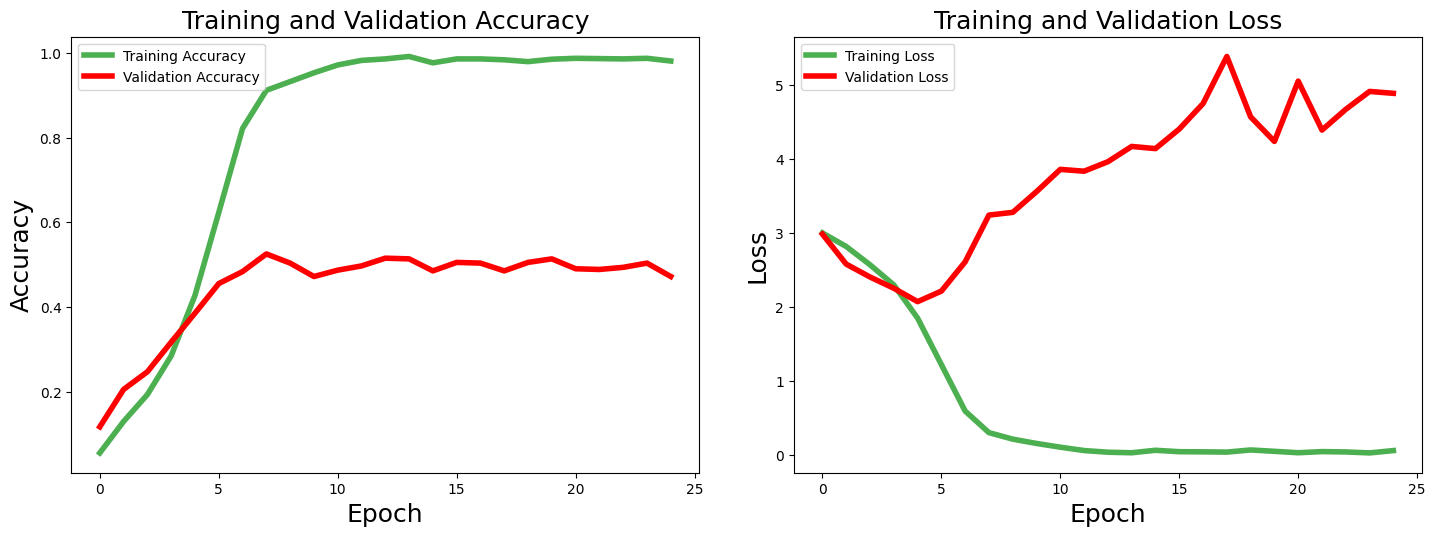

In [20]:
import matplotlib.pyplot as plt
epochs_range = range(25)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
plt.show()

In [25]:
predictions = model.predict(x_val)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(y_val, predicted_classes, target_names=categories))

19/19 [==============================] - 9s 454ms/step
                  precision    recall  f1-score   support

        biriyani       0.19      0.10      0.13        30
    bisibelebath       0.43      0.20      0.27        30
      butternaan       0.19      0.10      0.13        30
           chaat       0.39      0.43      0.41        30
        chappati       0.57      0.77      0.66        30
          dhokla       0.55      0.77      0.64        30
            dosa       0.17      0.07      0.10        30
     gulab jamun       0.35      0.37      0.36        30
           halwa       0.56      0.47      0.51        30
            idly       0.52      0.53      0.52        30
      kathi roll       0.46      0.60      0.52        30
       meduvadai       0.22      0.23      0.23        30
         noodles       0.35      0.57      0.44        30
       paniyaram       0.61      0.77      0.68        30
           poori       0.55      0.20      0.29        30
          samosa

## Transfer Learning...

In [27]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = "imagenet")
base_model.trainable = False
model = tf.keras.Sequential([base_model, tf.keras.layers.GlobalAveragePooling2D(), tf.keras.layers.Dropout(0.2), tf.keras.layers.Dense(20, activation="softmax")])
model.summary()

9406464/9406464 [==============================] - 2s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 8, 8, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 20)                25620     
                                                                 
Total params: 2283604 (8.71 MB)
Trainable params: 25620 (100.08 KB)
Non-trainable params: 2257984 (8.61 MB)
_______________

In [28]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history1 = model.fit(x_train,y_train,epochs = 50, validation_data = (x_val, y_val))

Epoch 1/50


c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


44/44 [==============================] - 37s 756ms/step - loss: 2.5805 - accuracy: 0.2571 - val_loss: 1.7304 - val_accuracy: 0.5167
Epoch 2/50
44/44 [==============================] - 30s 695ms/step - loss: 1.3830 - accuracy: 0.6257 - val_loss: 1.2018 - val_accuracy: 0.6767
Epoch 3/50
44/44 [==============================] - 31s 704ms/step - loss: 0.9651 - accuracy: 0.7421 - val_loss: 0.9919 - val_accuracy: 0.7383
Epoch 4/50
44/44 [==============================] - 30s 694ms/step - loss: 0.7655 - accuracy: 0.7964 - val_loss: 0.8826 - val_accuracy: 0.7467
Epoch 5/50
44/44 [==============================] - 30s 683ms/step - loss: 0.6193 - accuracy: 0.8500 - val_loss: 0.8146 - val_accuracy: 0.7800
Epoch 6/50
44/44 [==============================] - 29s 673ms/step - loss: 0.5434 - accuracy: 0.8671 - val_loss: 0.7583 - val_accuracy: 0.7850
Epoch 7/50
44/44 [==============================] - 29s 668ms/step - loss: 0.4676 - accuracy: 0.8957 - val_loss: 0.7153 - val_accuracy: 0.8000
Epoch 8/50

In [31]:
predictions = model.predict(x_val)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(y_val, predicted_classes, target_names=categories))

19/19 [==============================] - 10s 432ms/step
                  precision    recall  f1-score   support

        biriyani       0.83      0.83      0.83        30
    bisibelebath       0.71      0.50      0.59        30
      butternaan       0.81      0.70      0.75        30
           chaat       0.74      0.87      0.80        30
        chappati       0.93      0.83      0.88        30
          dhokla       0.90      0.93      0.92        30
            dosa       0.84      0.70      0.76        30
     gulab jamun       0.97      0.97      0.97        30
           halwa       0.63      0.80      0.71        30
            idly       0.84      0.90      0.87        30
      kathi roll       0.81      1.00      0.90        30
       meduvadai       0.93      0.87      0.90        30
         noodles       0.93      0.93      0.93        30
       paniyaram       0.97      0.93      0.95        30
           poori       0.90      0.87      0.88        30
          samos